# Medical Insurance Cost Project

## Attribute Information

- **age:** age of primary beneficiary

- **sex:** insurance contractor gender, female, male

- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children:** Number of children covered by health insurance / Number of dependents

- **smoker:** Smoking

- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- **charges:** Individual medical costs billed by health insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have to encode 3 columns - sex, smoker and region as their datatype is object

In [4]:
df.shape

(1338, 7)

In [5]:
# Checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Checking for duplicates value
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(1337, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


std of age is not balanced maybe because of ouliers also quantiles are not balanced. We will deal with them soon

### Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab_enc=LabelEncoder()

In [11]:
df['sex'] = lab_enc.fit_transform(df['sex'])

In [12]:
df['smoker'] = lab_enc.fit_transform(df['smoker'])

In [13]:
df['region'] = lab_enc.fit_transform(df['region'])

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


### Distribution of data

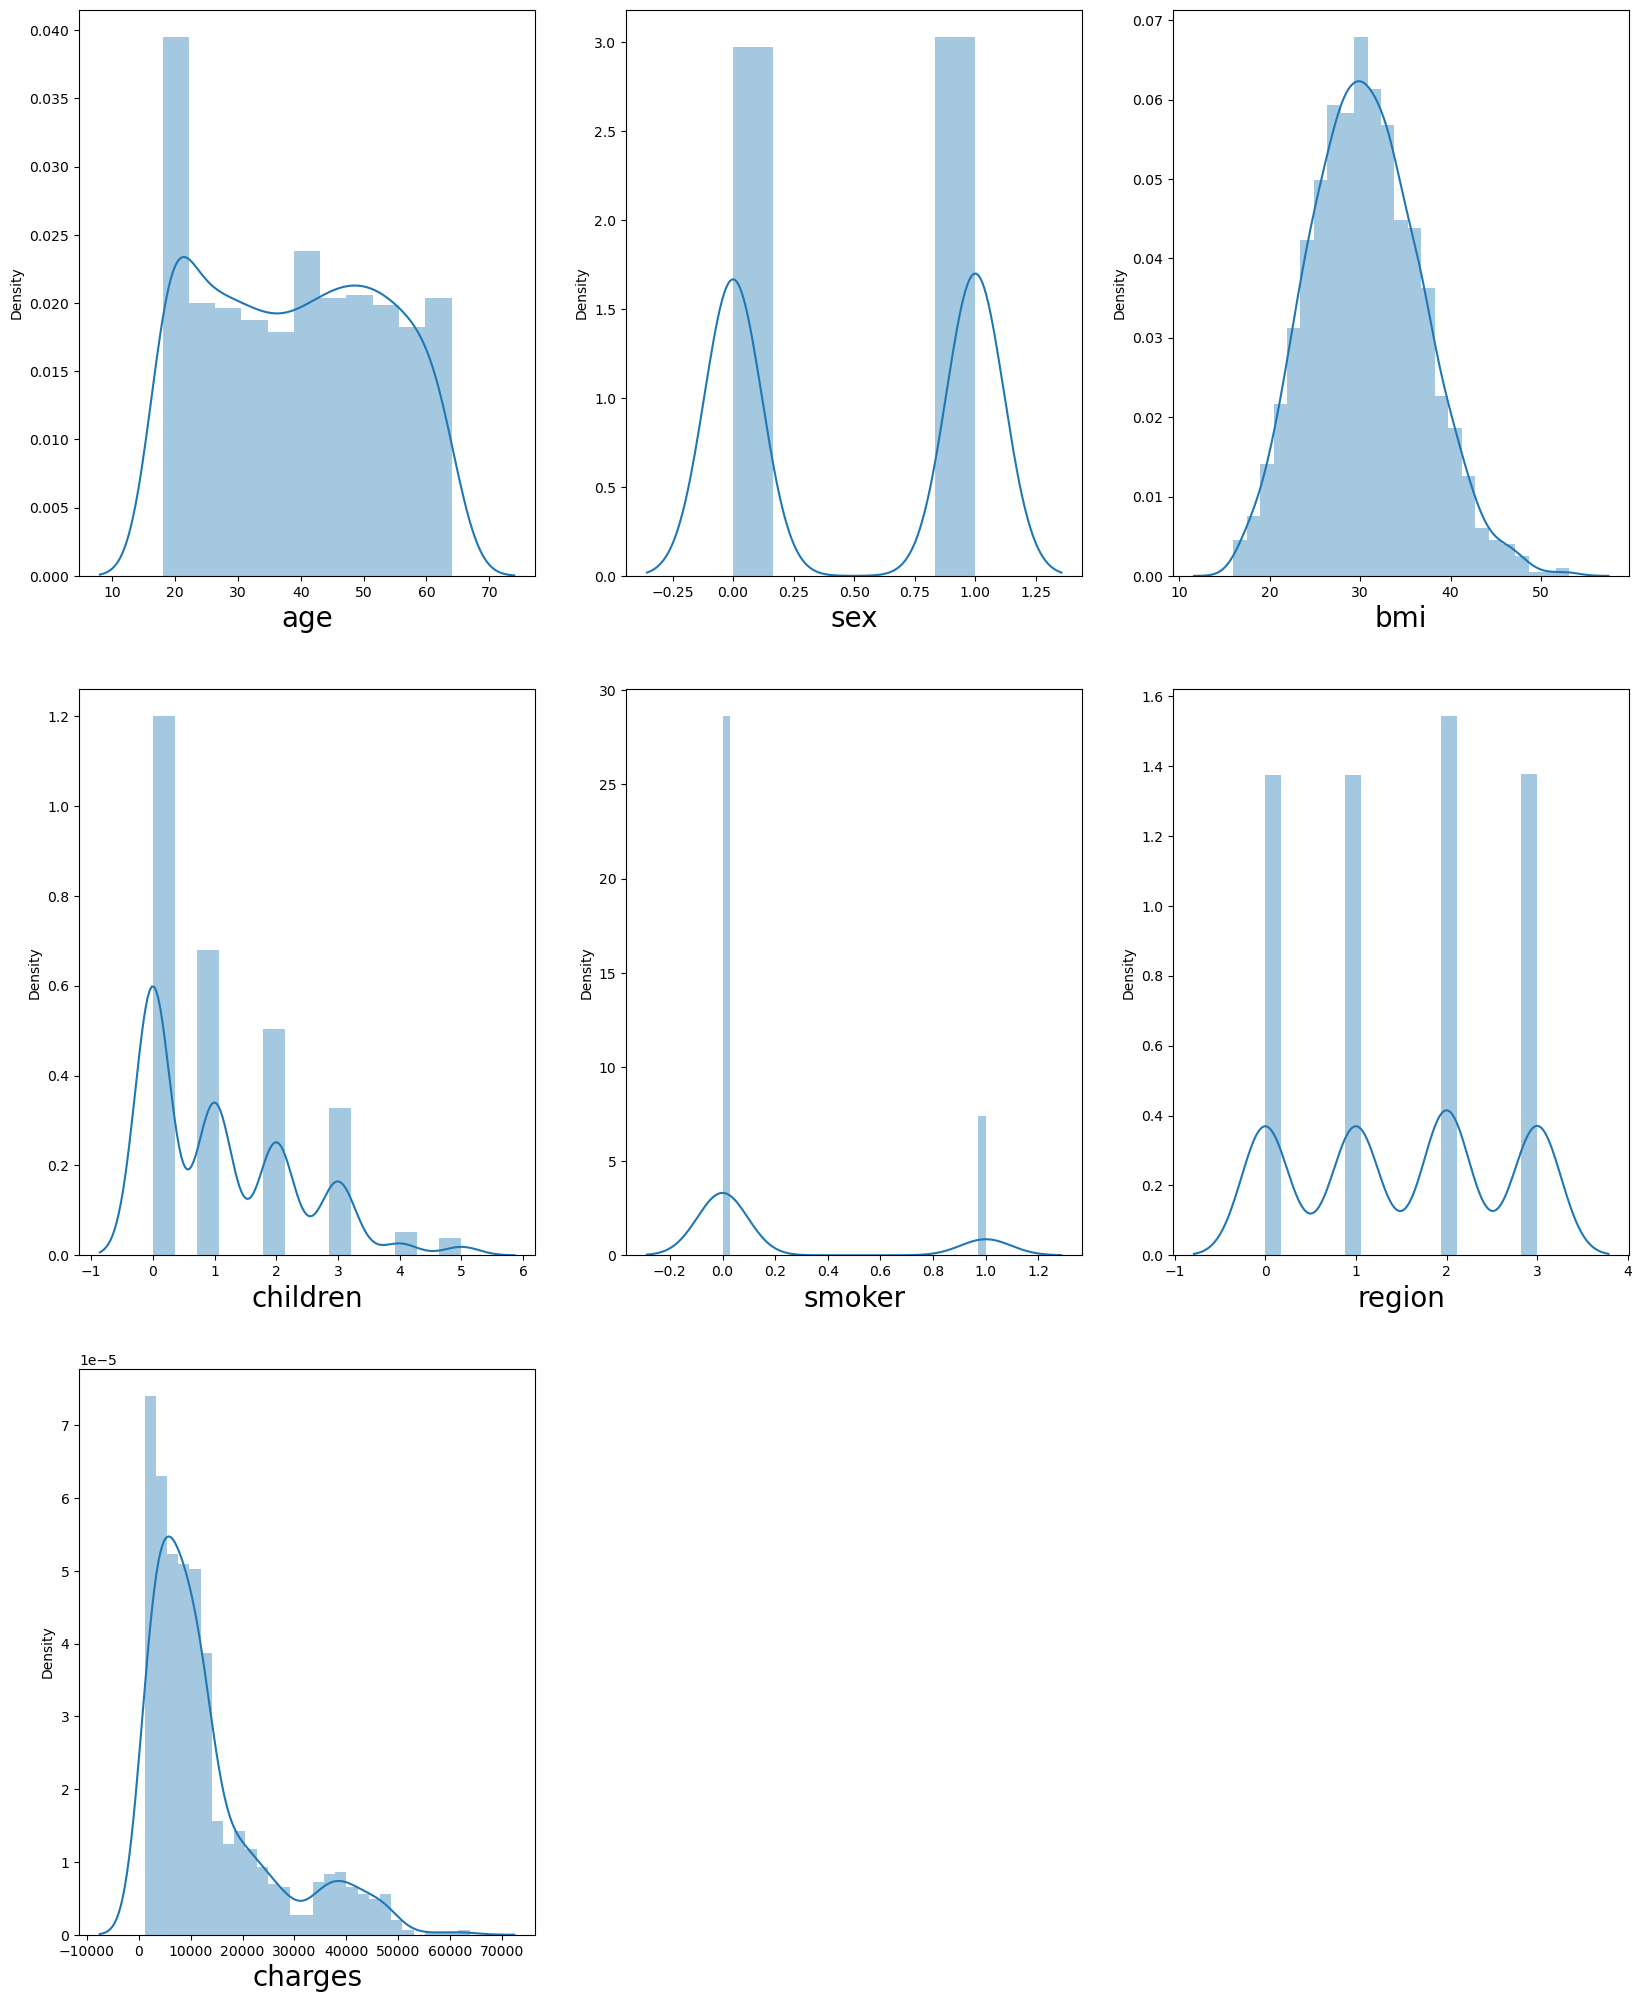

In [16]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()

Age column is almost normally distributed, bmi is perfect normally distributed and rest are categorical columns and label, so we can't touch them.

### Relationship (Multicollinearity )

It is very hard to derive relation b/w feature and label as label has continuous data, it's a regression problem. So it will be very hard for machine to draw graph for it. Also it's impossible to visualize and interpret.

Instead we can use other way i.e., corrwith to get a rough idea

In [17]:
df.drop('charges',axis=1).corrwith(df.charges)

age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.006547
dtype: float64

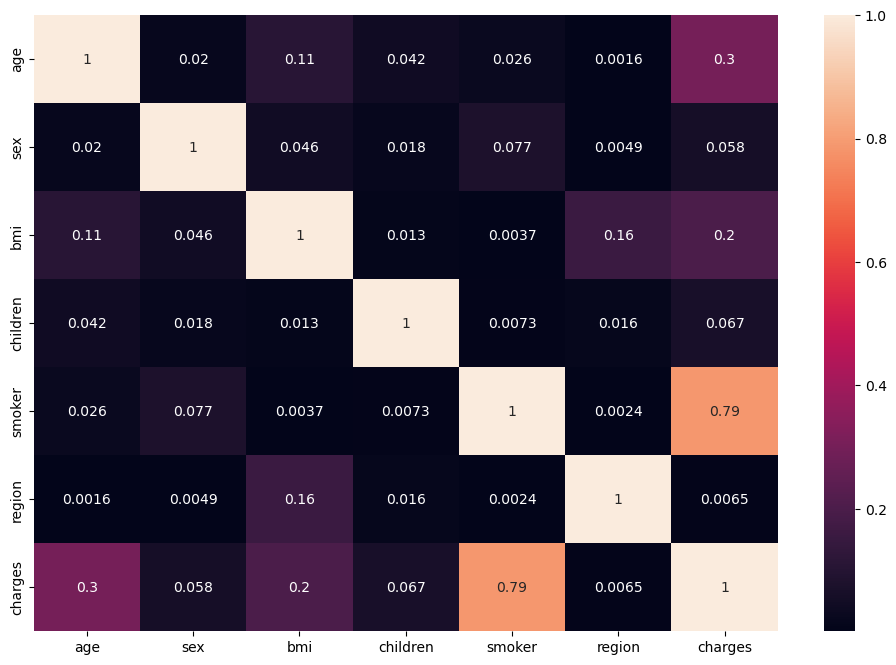

In [18]:
df_corr = df.corr().abs()
plt.figure(figsize = (12,8))
sns.heatmap(df_corr, annot= True, annot_kws= {'size' : 10})
plt.show()

So, yeah we will take all.

In [19]:
x = df.drop(columns = 'charges')
y = df.charges

In [20]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

### Train-test split 

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

### Model Initializing and Model Training

In [22]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
lm.score(x_test,y_test)

0.7962578620326622

In [24]:
# We can't use hyper-parameter tuning on LinearRegression as parameters are specific here.

# Congratulations, we have built the model with almost 80% accuracy score.